In [35]:
import pandas as pd
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import log_loss, make_scorer, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
import xgboost as xgb

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
train = pd.read_csv('train_consolidado.csv')
train['target'] = train['fault_severity']
to_drop = ['id','fault_severity']
train.drop(to_drop, axis=1, inplace=True)

scaler = StandardScaler().fit_transform(train)
X, y = np.array(train.iloc[:,:-1]), np.array(train.iloc[:,-1])
train_matrix_1 = xgb.DMatrix(data = X, label = y)

In [ ]:
train_2 = pd.read_csv('train_2.csv')
train_2['target'] = train_2['fault_severity']
to_drop = ['id','fault_severity']
train_2.drop(to_drop, axis=1, inplace=True)

scaler = StandardScaler().fit_transform(train_2)
X, y = np.array(train_2.iloc[:,:-1]), np.array(train_2.iloc[:,-1])
train_matrix_2 = xgb.DMatrix(data = X, label = y)

# 1 XGB

In [ ]:
params = {
        'objective': 'multi:softprob',
        'num_class':3,
        }

In [ ]:
cv_results_1 = xgb.cv(dtrain=train_matrix_1, params=params, 
                      nfold=5, metrics="mlogloss", as_pandas=True, num_boost_round = 100, early_stopping_rounds = 50)
cv_results_2 = xgb.cv(dtrain=train_matrix_2, params=params, 
                      nfold=5, metrics="mlogloss", as_pandas=True, num_boost_round = 100, early_stopping_rounds = 50)

In [ ]:
print('mLogLoss_1: ', cv_results_1['test-mlogloss-mean'].tail(1))
print('mLogLoss_2: ', cv_results_2['test-mlogloss-mean'].tail(1))

mLogLoss_1:  40    0.541998
Name: test-mlogloss-mean, dtype: float64
mLogLoss_2:  99    0.534318
Name: test-mlogloss-mean, dtype: float64


# 2 XGB

In [ ]:
params = {
        'learning_rate':0.1,
        'colsample_bytree':0.3,
        'max_depth': 5,
        'objective': 'multi:softprob',
        'eval_metric':['mlogloss'],
        'num_class':3,
        }

cv_results_1 = xgb.cv(dtrain=train_matrix_1, params=params, 
                      nfold=5, metrics=["mlogloss"], as_pandas=True, num_boost_round = 200, early_stopping_rounds = 50)

cv_results_2 = xgb.cv(dtrain=train_matrix_2, params=params,
                      nfold=5, metrics=["mlogloss"], as_pandas=True,num_boost_round = 200, early_stopping_rounds = 50)

print('mLogLoss_1: ', cv_results_1['test-mlogloss-mean'].tail(1))
print('mLogLoss_2: ', cv_results_2['test-mlogloss-mean'].tail(1))

mLogLoss_1:  199    0.540507
Name: test-mlogloss-mean, dtype: float64
mLogLoss_2:  199    0.526545
Name: test-mlogloss-mean, dtype: float64


# 3 XGB

In [ ]:
params = {
        'learning_rate':0.1,
        'colsample_bytree':0.2, # Cambio de 0.3 a 0.2
        'max_depth': 5,
        'objective': 'multi:softprob',
        'eval_metric':['mlogloss'],
        'num_class':3,
        }

cv_results_1 = xgb.cv(dtrain=train_matrix_1, params=params, 
                      nfold=5, metrics=["mlogloss"], as_pandas=True, num_boost_round = 200, early_stopping_rounds = 50)

cv_results_2 = xgb.cv(dtrain=train_matrix_2, params=params,
                      nfold=5, metrics=["mlogloss"], as_pandas=True,num_boost_round = 200, early_stopping_rounds = 50)

print('mLogLoss_1: ', cv_results_1['test-mlogloss-mean'].tail(1))
print('mLogLoss_2: ', cv_results_2['test-mlogloss-mean'].tail(1))

mLogLoss_1:  199    0.54783
Name: test-mlogloss-mean, dtype: float64
mLogLoss_2:  199    0.528692
Name: test-mlogloss-mean, dtype: float64


# 4 XGB

In [ ]:
params = {
        'learning_rate':0.15,
        'max_depth':6,
        'gamma':0,
        'subsample':1,
        'colsample_bytree':0.65,
        'objective': 'multi:softprob',
        'num_class':3,
        'eval_metric':['mlogloss'],
    }
    
cv_results_1 = xgb.cv(dtrain=train_matrix_1, params=params, 
                      nfold=5, metrics=["mlogloss"], as_pandas=True, num_boost_round = 200, early_stopping_rounds = 50)

cv_results_2 = xgb.cv(dtrain=train_matrix_2, params=params,
                      nfold=5, metrics=["mlogloss"], as_pandas=True,num_boost_round = 200, early_stopping_rounds = 50)

print('mLogLoss_1: ', cv_results_1['test-mlogloss-mean'].tail(1))
print('mLogLoss_2: ', cv_results_2['test-mlogloss-mean'].tail(1))

mLogLoss_1:  95    0.538501
Name: test-mlogloss-mean, dtype: float64
mLogLoss_2:  128    0.521124
Name: test-mlogloss-mean, dtype: float64


# RandomSearch XGB

In [ ]:
train_2 = pd.read_csv('train_2.csv')
train_2['target'] = train_2['fault_severity']
to_drop = ['id','fault_severity']
train_2.drop(to_drop, axis=1, inplace=True)


X, y = np.array(train_2.iloc[:,:-1]), np.array(train_2.iloc[:,-1])

In [ ]:
params = {
        'learning_rate':[0.1,0.15,0.20],
        'max_depth':[6,8],
        'num_boost_round':[200],
        'n_estimators':[200,250],
        'subsample':[0.7,0.9,1],
        'colsample_bytree':[0.5,1],
        'objective': ['multi:softprob'],
        'num_class':[3],
    }

In [ ]:
model = xgb.XGBClassifier()
gs = RandomizedSearchCV(model, params, cv = 3, 
                        scoring=make_scorer(log_loss, needs_proba=True, labels=y, greater_is_better=False),
                        verbose = 5, n_iter = 70)
gs.fit(X, y)

Fitting 3 folds for each of 70 candidates, totalling 210 fits
[CV] subsample=0.7, objective=multi:softprob, num_class=3, num_boost_round=200, n_estimators=200, max_depth=8, learning_rate=0.15, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.7, objective=multi:softprob, num_class=3, num_boost_round=200, n_estimators=200, max_depth=8, learning_rate=0.15, colsample_bytree=0.5, score=-0.608, total=  28.6s
[CV] subsample=0.7, objective=multi:softprob, num_class=3, num_boost_round=200, n_estimators=200, max_depth=8, learning_rate=0.15, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   28.6s remaining:    0.0s


[CV]  subsample=0.7, objective=multi:softprob, num_class=3, num_boost_round=200, n_estimators=200, max_depth=8, learning_rate=0.15, colsample_bytree=0.5, score=-0.545, total=  28.4s
[CV] subsample=0.7, objective=multi:softprob, num_class=3, num_boost_round=200, n_estimators=200, max_depth=8, learning_rate=0.15, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   57.0s remaining:    0.0s


[CV]  subsample=0.7, objective=multi:softprob, num_class=3, num_boost_round=200, n_estimators=200, max_depth=8, learning_rate=0.15, colsample_bytree=0.5, score=-0.570, total=  28.6s
[CV] subsample=0.7, objective=multi:softprob, num_class=3, num_boost_round=200, n_estimators=200, max_depth=8, learning_rate=0.2, colsample_bytree=1 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.4min remaining:    0.0s


[CV]  subsample=0.7, objective=multi:softprob, num_class=3, num_boost_round=200, n_estimators=200, max_depth=8, learning_rate=0.2, colsample_bytree=1, score=-0.704, total=  52.5s
[CV] subsample=0.7, objective=multi:softprob, num_class=3, num_boost_round=200, n_estimators=200, max_depth=8, learning_rate=0.2, colsample_bytree=1 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.3min remaining:    0.0s


[CV]  subsample=0.7, objective=multi:softprob, num_class=3, num_boost_round=200, n_estimators=200, max_depth=8, learning_rate=0.2, colsample_bytree=1, score=-0.626, total=  52.1s
[CV] subsample=0.7, objective=multi:softprob, num_class=3, num_boost_round=200, n_estimators=200, max_depth=8, learning_rate=0.2, colsample_bytree=1 
[CV]  subsample=0.7, objective=multi:softprob, num_class=3, num_boost_round=200, n_estimators=200, max_depth=8, learning_rate=0.2, colsample_bytree=1, score=-0.661, total=  52.2s
[CV] subsample=0.9, objective=multi:softprob, num_class=3, num_boost_round=200, n_estimators=200, max_depth=8, learning_rate=0.15, colsample_bytree=0.5 
[CV]  subsample=0.9, objective=multi:softprob, num_class=3, num_boost_round=200, n_estimators=200, max_depth=8, learning_rate=0.15, colsample_bytree=0.5, score=-0.597, total=  24.6s
[CV] subsample=0.9, objective=multi:softprob, num_class=3, num_boost_round=200, n_estimators=200, max_depth=8, learning_rate=0.15, colsample_bytree=0.5 
[CV]

[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed: 122.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                   param_distributions={'colsample_bytree': [0.5, 1],
                                        'learning_rate': [0.1, 0.15, 0.2],
                                

In [ ]:
gs.cv_results_['mean_test_score'], gs.best_params_, gs.best_score_ 

(array([-0.57399779, -0.66388117, -0.56128069, -0.59585111, -0.53669327,
        -0.63703798, -0.59225578, -0.57199099, -0.52737957, -0.57263821,
        -0.55075835, -0.5873085 , -0.54452253, -0.54071668, -0.5572335 ,
        -0.64037193, -0.62792475, -0.54334724, -0.60693461, -0.56274971,
        -0.68177457, -0.5410659 , -0.53233165, -0.53446531, -0.5938459 ,
        -0.54299275, -0.59794962, -0.57138282, -0.62320948, -0.53499575,
        -0.57693091, -0.55911338, -0.57357298, -0.52800508, -0.53425016,
        -0.5496662 , -0.53237251, -0.55003395, -0.61431148, -0.59517164,
        -0.62786537, -0.64878343, -0.61380254, -0.59510356, -0.5590457 ,
        -0.5752564 , -0.58042195, -0.55321806, -0.5672579 , -0.53029477,
        -0.52907663, -0.54075154, -0.56307392, -0.52923397, -0.55348912,
        -0.55330644, -0.57475693, -0.54330604, -0.54414587, -0.57647553,
        -0.55819413, -0.55759492, -0.55102903, -0.704344  , -0.54010039,
        -0.53331852, -0.6009315 , -0.54106257, -0.5

# Analizis de resultados

In [172]:
train_2 = pd.read_csv('train_2.csv')

train_2['target'] = train_2['fault_severity']
y = train_2['fault_severity']
to_drop = ['id','fault_severity']

train_2.drop(to_drop, axis=1, inplace=True)
columns = train_2.columns[:-1]

train_2 = StandardScaler().fit_transform(train_2)

X = train_2[:,:-1]

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [174]:
params =  {'colsample_bytree': 0.5,
  'learning_rate': 0.1,
  'max_depth': 6,
  'n_estimators': 200,
  'num_boost_round': 200,
  'objective': 'multi:softprob',
  'num_class': 3,
  'subsample': 0.9}

In [175]:
model = xgb.XGBClassifier(**params).fit(X_train, y_train)

In [176]:
feature_importance = pd.DataFrame({'index':columns,
                                   'importance':model.feature_importances_})
feature_importance = feature_importance.sort_values(by = 'importance', ascending=False)
feature_importance = feature_importance[feature_importance['importance'] != 0]
feature_importance.to_csv('feature_importance_xgboost.csv')

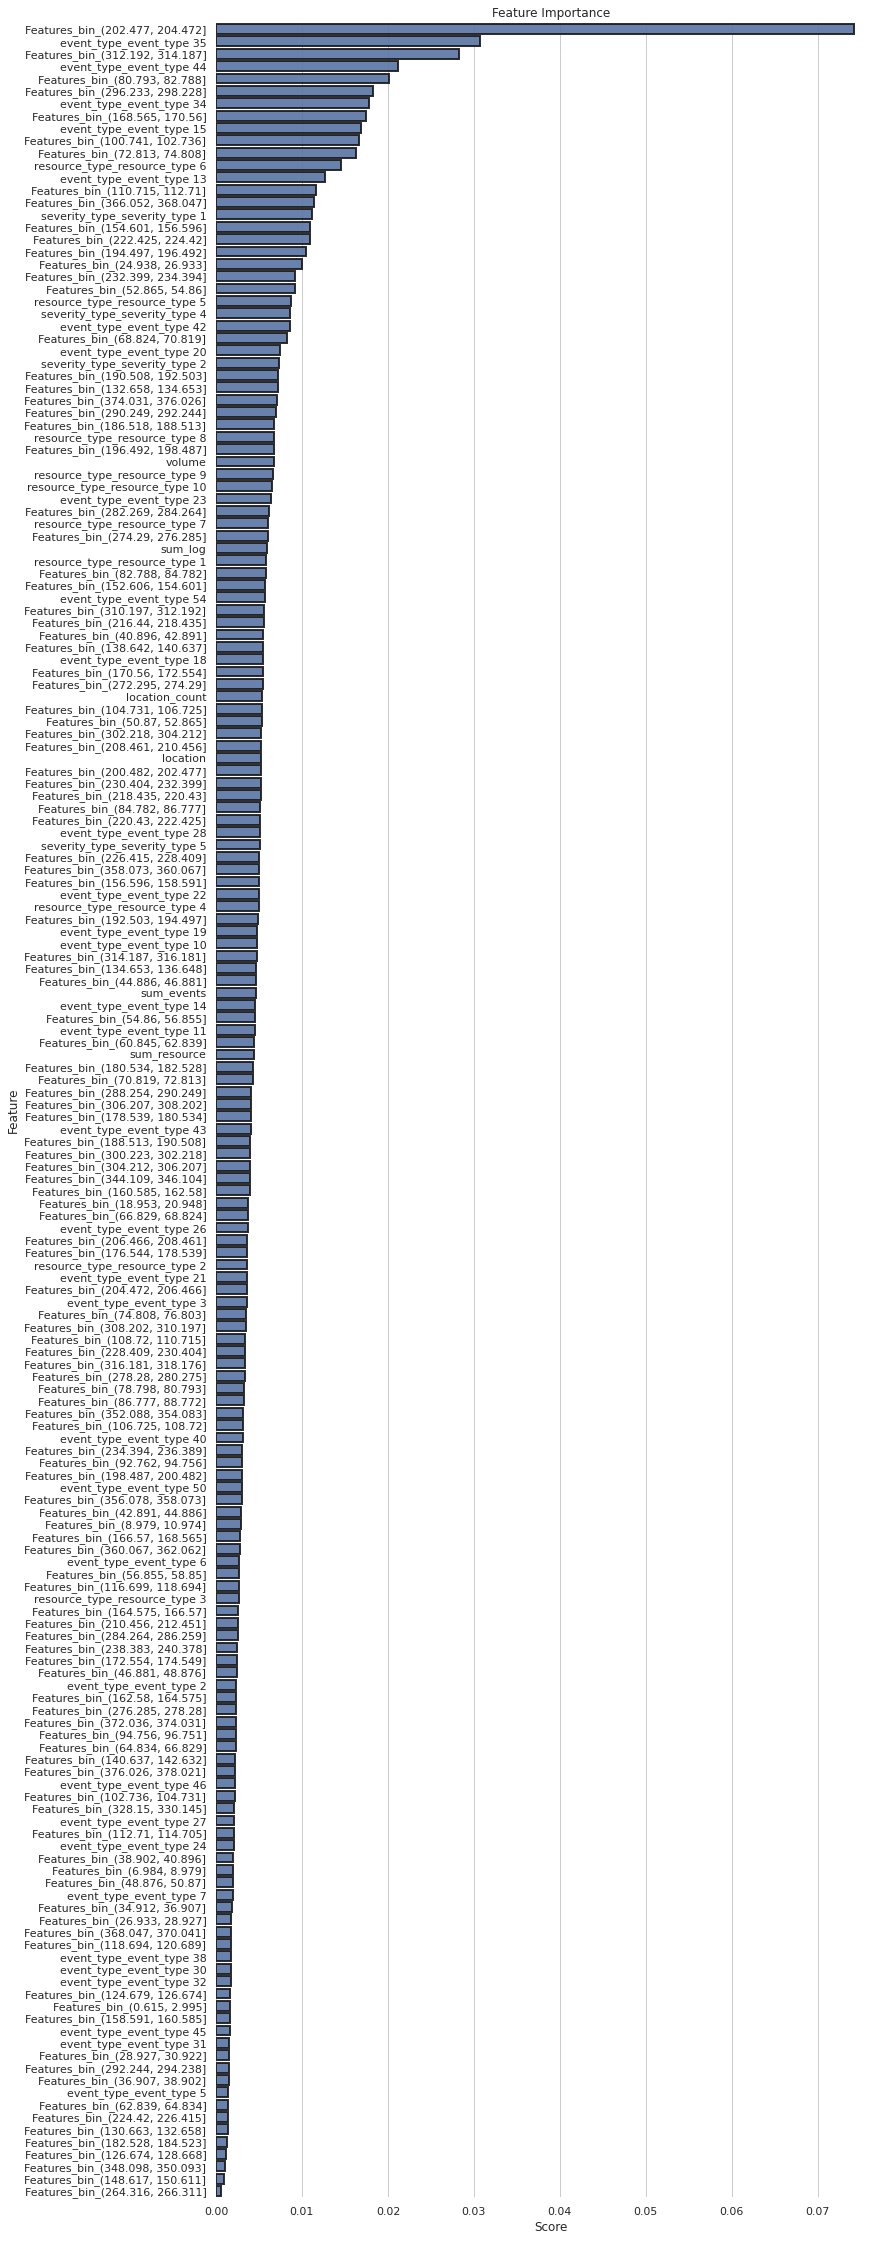

In [177]:
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(12, 40))

kwargs = {'alpha':0.9, 'linewidth':2, 'edgecolor':'k'}

sns.barplot(x="importance", y = 'index', data=feature_importance,
            label="index", color="b", **kwargs)


ax.set(ylabel="Feature",
       xlabel="Score")

sns.despine(left=True, bottom=True)

ax.set_title('Feature Importance')

plt.show()

f.savefig('Feature_importance_XGBoost.png', dpi=100,
            bbox_inches='tight')

In [178]:
y_pred  = model.predict(X_test)

In [179]:
cm = confusion_matrix(y_test, predictions)

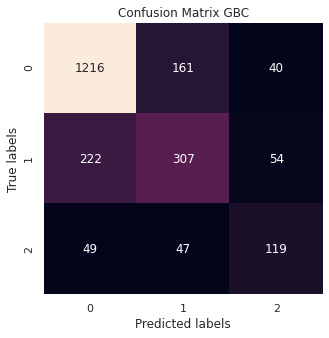

In [180]:
fig, ax = plt.subplots(figsize=(5,5))

sns.heatmap(cm, annot=True, ax = ax, cbar=False, fmt='g'); 


ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix GBC'); 
ax.xaxis.set_ticklabels(['0', '1', '2']); ax.yaxis.set_ticklabels(['0', '1', '2']);
plt.show()

f.savefig('confusion_matrix_GBC.png', dpi=100,
          bbox_inches='tight')

In [181]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1417
           1       0.60      0.53      0.56       583
           2       0.56      0.55      0.56       215

    accuracy                           0.74      2215
   macro avg       0.66      0.65      0.65      2215
weighted avg       0.73      0.74      0.74      2215



In [164]:
log_loss(y_test, model.predict_proba(X_test))

0.5512423185532693

# Creando Submission

In [166]:
train_2 = pd.read_csv('train_2.csv')
test_2 = pd.read_csv('test_2.csv')

y = train_2['fault_severity']
to_drop = ['id','fault_severity']

train_2.drop(to_drop, axis=1, inplace=True)
test_2.drop(to_drop[:1], inplace=True, axis=1)

train_2 = StandardScaler().fit_transform(train_2)
test_2 = StandardScaler().fit_transform(test_2)

X = train_2
X_test = test_2

In [167]:
params =  {'colsample_bytree': 0.5,
  'learning_rate': 0.1,
  'max_depth': 6,
  'n_estimators': 200,
  'num_boost_round': 200,
  'num_class': 3,
  'objective': 'multi:softprob',
  'subsample': 0.9}

In [168]:
model = xgb.XGBClassifier(**params).fit(X, y)

In [169]:
y_submision =  model.predict_proba(X_test)

In [170]:
test = pd.read_csv('test_2.csv')
pred_df=pd.DataFrame(y_submision,columns=['predict_0', 'predict_1', 'predict_2'])
submission=pd.concat([test[['id']],pred_df],axis=1)
submission.to_csv('submission_3.csv',index=False,header=True)

In [171]:
with open('submission_3.pkl', 'wb') as file:
    pickle.dump(model, file=file)